In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-notebook')
pd.options.display.max_rows = 10

In [3]:
plt.rcParams["figure.figsize"] = (12, 6)

In [4]:
ny_pois_ids = np.loadtxt("NYC_POIs/ny_municipality_pois_id.csv")

# This dictionary maps attributes in the table with correct data types
d_types = {'@type':str, '@lat':float, '@lon':float, 'amenity':str, 'name':str, 
           'shop':str, 'public_transport':str, 'highway':str}
all_pois_df = pd.read_csv("NYC_POIs/pois_all_info", sep='\t', index_col='@id', dtype=d_types)

# Filter only POIS in NY municipality: intersection on indices
pois_df = all_pois_df.loc[ny_pois_ids]
pois_df

,@type,@lat,@lon,amenity,name,shop,public_transport,highway
@id,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
42811266,node,40.704807,-73.772734,NaN,NaN,NaN,stop_position,NaN
...,...,...,...,...,...,...,...,...
2553096114,node,40.736006,-73.713202,NaN,NaN,NaN,NaN,NaN
2553096138,node,40.736020,-73.713063,NaN,NaN,NaN,NaN,NaN
2553096143,node,40.736024,-73.713046,NaN,NaN,NaN,NaN,NaN


In [5]:
pois_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53550 entries, 42432939 to 6146672068
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   @type             53550 non-null  object 
 1   @lat              53550 non-null  float64
 2   @lon              53550 non-null  float64
 3   amenity           24712 non-null  object 
 4   name              30550 non-null  object 
 5   shop              8717 non-null   object 
 6   public_transport  8376 non-null   object 
 7   highway           7559 non-null   object 
dtypes: float64(2), object(6)
memory usage: 3.7+ MB


In [80]:
s = pd.Series([40, 30, 10, 5], index=['red', 'green', 'blue', 'yellow']).sort_values(ascending=False)
sm=s.cumsum()/s.sum()
mask=sm>0.8
mask
#  The first item in the mask with a True value will be the first non-frequent item

red       False
green      True
blue       True
yellow     True
dtype: bool

In [81]:
s[:mask.values.argmax()]

red    40
dtype: int64

In [11]:
pois_df['amenity'].value_counts().cumsum()

bicycle_parking        6052
restaurant            10208
fast_food             11739
cafe                  13113
post_box              14206
                      ...  
salon                 24708
clothing store        24709
Statue                24710
research_institute    24711
swingerclub           24712
Name: amenity, Length: 119, dtype: int64

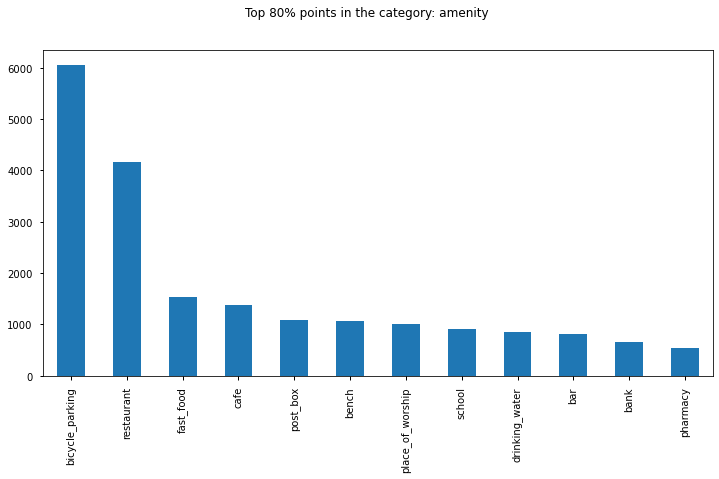

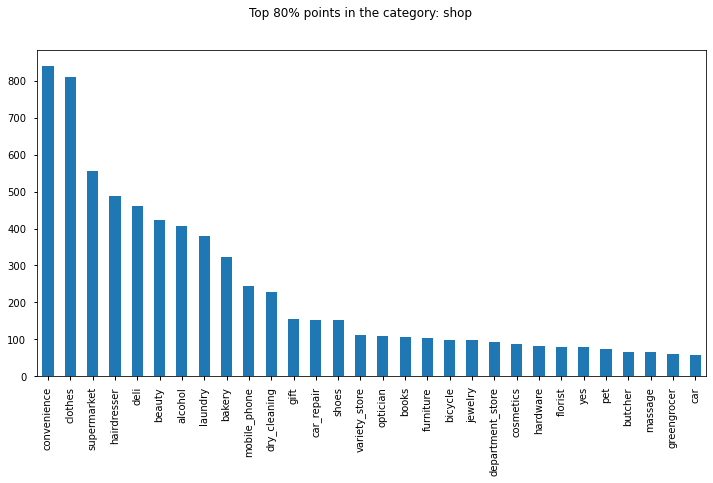

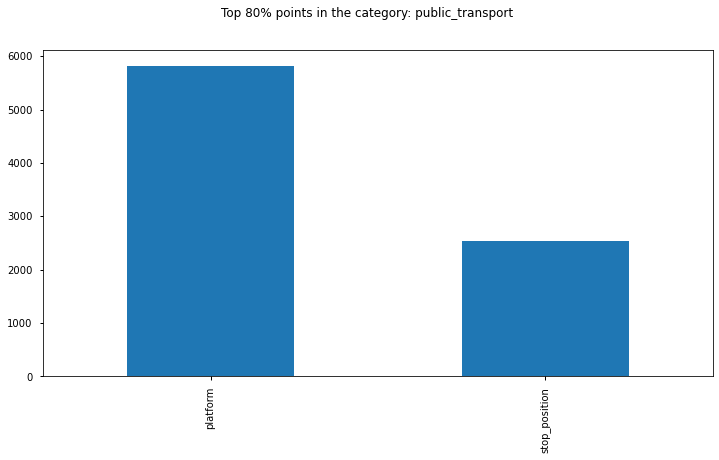

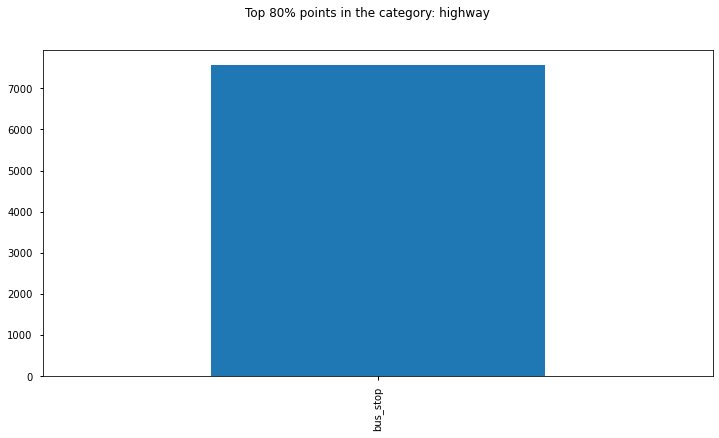

In [30]:
# amenity, shop, public_transport and highway

def get_top_perc(series, perc_value=.8):
    perc = series.cumsum() / series.sum()
    arg = (perc > perc_value).values.argmax()
    return series.iloc[:arg+1]
    
for col in ['amenity', 'shop', 'public_transport', 'highway']:
    p = .8
    valc = pois_df[col].value_counts()
    valf = get_top_perc(valc, p)
    fig, ax = plt.subplots()
    valf.plot(kind='bar', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    fig.suptitle(f"Top {p*100:.0f}% points in the category: {col}")

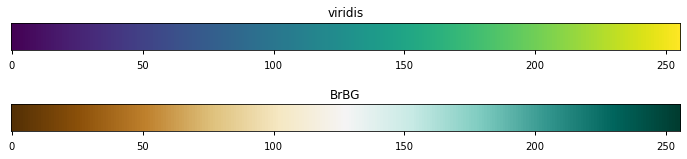

In [38]:
from matplotlib.cm import get_cmap

x = np.linspace(0, 1, 256)
x = np.vstack((x, x))
fig, axes = plt.subplots(nrows=2, figsize=(12,2))
plt.subplots_adjust(hspace=2) # adjust the vertical space between subplots

for ax, name in zip(axes, ['viridis', 'BrBG']):
    ax.imshow(x, aspect='auto', cmap=plt.get_cmap(name))
    ax.grid(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(name)

In [60]:
import seaborn as sns

class Map:
    def __init__(self, df):
        """ Store Dataset with POIs information."""
        self.pois_df = df
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()
        
    def plot_map(self):
        """ Display an image with NY map and return the Axes object."""
        fig, ax = plt.subplots()
        nyc_img = plt.imread('NYC_POIs/New_York_City_Map.PNG')
        ax.imshow(nyc_img, zorder=0, extent=[self.long_min,
                                             self.long_max,
                                             self.lat_min,
                                             self.lat_max])
        ax.grid(False)
        return ax
        
    def plot_pois(self, ax, category, mask):
        """Plot data on specified Axis."""
        df = self.pois_df.loc[mask]
        
        # Version 2: using seaborn
        sns.scatterplot(df['@lon'], df['@lat'], hue=df[category], ax=ax, 
                         marker='o', s=5, linewidth=0, palette="viridis", legend='full')

        ax.legend() # show the legend, required by Version 1
        ax.grid(False)
        return ax

/Users/alessandroferi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


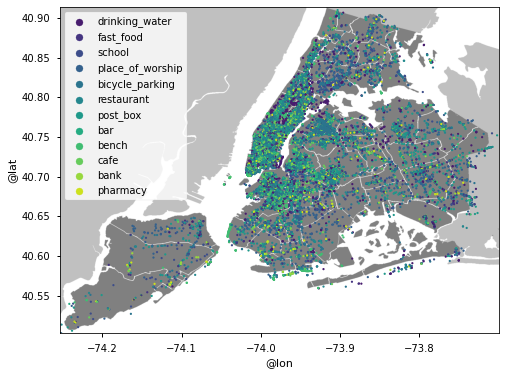

In [61]:
def show_category_on_map(df, column, perc_value):
    """
    Plot the New York map with POIs of a specific category.
    Only the top 'perc_value'% frequent types are plotted.
    """
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    ny_map = Map(df)
    
    ax = ny_map.plot_map()
    mask = df[column].isin(top_freq.index)
    ny_map.plot_pois(ax, column, mask)

show_category_on_map(pois_df, 'amenity', .8)

In [41]:
class Cell_converter:
    def __init__(self, df, n_splits):
        self.lat_min = df['@lat'].min()
        self.lat_max = df['@lat'].max()
        self.long_min = df['@lon'].min()
        self.long_max = df['@lon'].max()
        self.n_splits = n_splits
    
    def plot_grid(self, ax):
        lat_steps = np.linspace(self.lat_min, self.lat_max, self.n_splits + 1)
        long_steps = np.linspace(self.long_min, self.long_max, self.n_splits + 1)
        ax.hlines(lat_steps, self.long_min, self.long_max)
        ax.vlines(long_steps, self.lat_min, self.lat_max)
    
    def point_to_cell_coord(self, long, lat):
        x = int((long - self.long_min)/(self.long_max - self.long_min)*self.n_splits)
        y = int((lat - self.lat_min)/(self.lat_max - self.lat_min)*self.n_splits)
        return x, y
    
    def point_to_cell_id(self, long, lat):
        x, y = self.point_to_cell_coord(long, lat)
        return y * n_splits + x

n_splits = 20
cell_conv = Cell_converter(pois_df, n_splits)

pois_df['cell_id'] = pois_df.apply(lambda x: cell_conv.point_to_cell_id(x['@lon'], x['@lat']), axis=1)
pois_df.head()

,@type,@lat,@lon,amenity,name,shop,public_transport,highway,cell_id
@id,,,,,,,,,
42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN,310
42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN,250
42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN,337
42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN,353
42811266,node,40.704807,-73.772734,NaN,NaN,NaN,stop_position,NaN,197


In [76]:
def get_df_count(df, column, perc_value):
    counts = df[column].value_counts()
    top_freq = get_top_perc(counts, perc_value)
    mask = df[column].isin(top_freq.index)
    freq_df = df.loc[mask]
    # for each cell_id count the number of POIs for each type
    count_dframe = []
    for cell_id in range(n_splits**2):
        count_vals = freq_df.loc[freq_df['cell_id'] == cell_id][column].value_counts()
        count_vals.name = cell_id
        count_dframe.append(count_vals)

    cells_features_df = pd.DataFrame(count_dframe)
    cells_features_df = cells_features_df.fillna(0)
    return cells_features_df

In [77]:
shops_df = get_df_count(pois_df, 'shop', .6)
shops_df.head()

,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
amenities_df = get_df_count(pois_df, 'amenity', .6)
final_df = pd.concat([amenities_df, shops_df], axis=1)
final_df

,post_box,restaurant,fast_food,bicycle_parking,cafe,bench,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
final_corr = final_df.corr()
final_corr.head()

,post_box,restaurant,fast_food,bicycle_parking,cafe,bench,supermarket,convenience,gift,alcohol,clothes,bakery,beauty,laundry,hairdresser,deli,mobile_phone,dry_cleaning
post_box,1.000000,0.738146,0.791383,0.757908,0.751239,0.464872,0.831700,0.732534,0.572624,0.854463,0.640424,0.730414,0.744983,0.700626,0.764960,0.669046,0.747977,0.802623
restaurant,0.738146,1.000000,0.892643,0.933327,0.977129,0.325605,0.854280,0.698709,0.748171,0.893299,0.897885,0.934591,0.641513,0.533456,0.702188,0.527927,0.697886,0.779390
fast_food,0.791383,0.892643,1.000000,0.823712,0.931877,0.463410,0.762383,0.707077,0.808271,0.856165,0.790148,0.759500,0.726217,0.557794,0.758824,0.574192,0.776886,0.822514
bicycle_parking,0.757908,0.933327,0.823712,1.000000,0.922268,0.381228,0.858209,0.633704,0.662442,0.873462,0.839809,0.888446,0.673453,0.522363,0.745809,0.490781,0.607225,0.793769
cafe,0.751239,0.977129,0.931877,0.922268,1.000000,0.407526,0.813572,0.694446,0.786491,0.901696,0.875035,0.874180,0.657689,0.508593,0.732542,0.480233,0.690048,0.813883


<AxesSubplot:>

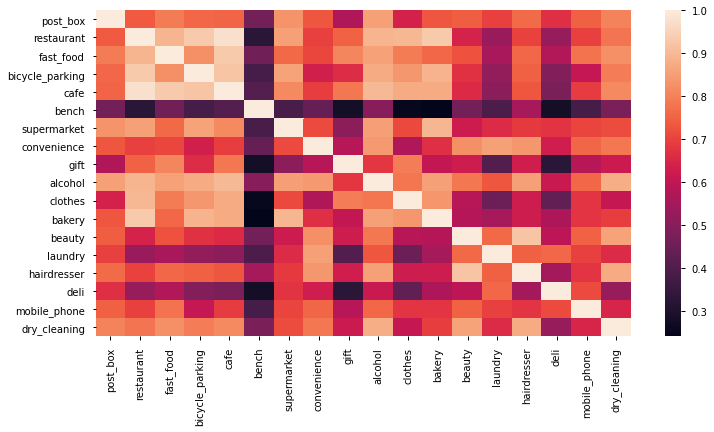

In [57]:
sns.heatmap(final_corr)